In [39]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.stats import probplot, shapiro, kstest, norm, linregress
import statsmodels.api as sm


In [40]:
df = pd.read_excel("glucosa.xlsx").set_index('Grupo de control')
df

,Nivel glucosa basal,Nivel glucosa 60 min
Grupo de control,,
1,90,159
1,82,151
1,80,148
1,75,138
1,74,141
...,...,...
2,95,169
2,99,172
2,88,173


Ejercicio 1

a) Obtener, usando algún programa estadístico, las medidas de centralización y dispersión para cada uno de los dos grupos de control para el nivel de glucosa basal, especificando para cada uno de los casos si la media es o no representativa.

In [41]:
grupo1 = df.loc[1]
grupo2 = df.loc[2]

In [42]:
variance_grupo1 = round(grupo1['Nivel glucosa basal'].var(), 2)
mode_grupo1 = grupo1['Nivel glucosa basal'].mode().values
range_grupo1 = grupo1['Nivel glucosa basal'].max() - grupo1['Nivel glucosa basal'].min()

summary_grupo1 = grupo1['Nivel glucosa basal'].describe().round(2)

q1_grupo1 = summary_grupo1['25%']
q3_grupo1 = summary_grupo1['75%']
iqr_grupo1 = q3_grupo1 - q1_grupo1

summary_grupo1['Variance'] = variance_grupo1
summary_grupo1['Mode'] = mode_grupo1
summary_grupo1['Range'] = range_grupo1
summary_grupo1['IQR'] = iqr_grupo1

print(summary_grupo1)

count                   35.0
mean                   84.69
std                     8.84
min                     65.0
25%                     78.5
50%                     82.0
75%                     90.5
max                    103.0
Variance               78.22
Mode        [75, 79, 82, 90]
Range                     38
IQR                     12.0
Name: Nivel glucosa basal, dtype: object


In [43]:
# Cálculo de métricas estadísticas para el grupo 2
variance_grupo2 = round(grupo2['Nivel glucosa basal'].var(), 2)
mode_grupo2 = grupo2['Nivel glucosa basal'].mode().values
range_grupo2 = grupo2['Nivel glucosa basal'].max() - grupo2['Nivel glucosa basal'].min()

summary_grupo2 = grupo2['Nivel glucosa basal'].describe().round(2)

q1_grupo2 = summary_grupo2['25%']
q3_grupo2 = summary_grupo2['75%']
iqr_grupo2 = q3_grupo2 - q1_grupo2

summary_grupo2['Variance'] = variance_grupo2
summary_grupo2['Mode'] = mode_grupo2
summary_grupo2['Range'] = range_grupo2
summary_grupo2['IQR'] = iqr_grupo2

print(summary_grupo2)


count        30.0
mean         89.4
std          7.35
min          77.0
25%          84.5
50%          90.0
75%          94.0
max         104.0
Variance    53.97
Mode         [88]
Range          27
IQR           9.5
Name: Nivel glucosa basal, dtype: object


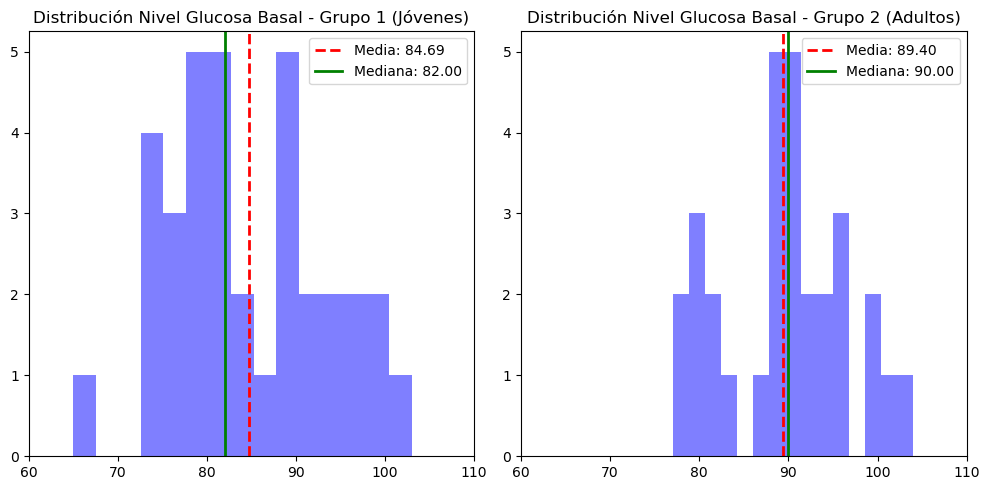

In [44]:
# Cálculo de la media y la mediana para ambos grupos
avg_grupo1 = grupo1['Nivel glucosa basal'].mean()
median_grupo1 = grupo1['Nivel glucosa basal'].median()

avg_grupo2 = grupo2['Nivel glucosa basal'].mean()
median_grupo2 = grupo2['Nivel glucosa basal'].median()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
limits_x = [60, 110]  

axes[0].hist(grupo1['Nivel glucosa basal'], bins=15, alpha=0.5, color='blue')
axes[0].axvline(avg_grupo1, color='red', linestyle='--', linewidth=2, 
                label=f'Media: {avg_grupo1:.2f}')
axes[0].axvline(median_grupo1, color='green', linestyle='-', linewidth=2, 
                label=f'Mediana: {median_grupo1:.2f}')
axes[0].set_title('Distribución Nivel Glucosa Basal - Grupo 1 (Jóvenes)')
axes[0].set_xlim(limits_x)
axes[0].legend()

axes[1].hist(grupo2['Nivel glucosa basal'], bins=15, alpha=0.5, color='blue')
axes[1].axvline(avg_grupo2, color='red', linestyle='--', linewidth=2, 
                label=f'Media: {avg_grupo2:.2f}')
axes[1].axvline(median_grupo2, color='green', linestyle='-', linewidth=2, 
                label=f'Mediana: {median_grupo2:.2f}')
axes[1].set_title('Distribución Nivel Glucosa Basal - Grupo 2 (Adultos)')
axes[1].set_xlim(limits_x)
axes[1].legend()

plt.tight_layout()
plt.show()


In [45]:
# Calcular desviación estándar y media para ambos grupos
std_dev_grupo1 = grupo1['Nivel glucosa basal'].std()
mean_grupo1 = grupo1['Nivel glucosa basal'].mean()

std_dev_grupo2 = grupo2['Nivel glucosa basal'].std()
mean_grupo2 = grupo2['Nivel glucosa basal'].mean()

cv_grupo1 = round(std_dev_grupo1 / mean_grupo1, 3)
cv_grupo2 = round(std_dev_grupo2 / mean_grupo2, 3)

print(f'El CV para el Grupo 1 (Jóvenes) es: {cv_grupo1}')
print(f'El CV para el Grupo 2 (Adultos) es: {cv_grupo2}')


El CV para el Grupo 1 (Jóvenes) es: 0.104
El CV para el Grupo 2 (Adultos) es: 0.082


Se calcularon los siguientes coeficientes de variación (CV):

Grupo 1: CV = 0.104

Grupo 2: CV = 0.082

Ambos valores son menores a 0.3, lo que indica que la dispersión relativa de los datos es baja. Sin embargo, la media sigue siendo representativa en ambos casos.

El coeficiente de variación es una medida de la dispersión de los datos respecto a la media. Un CV < 0.3 significa que la desviación estándar es pequeña en relación con la media, lo que sugiere que los datos están concentrados alrededor de la media.

La dispersión dentro de ambos grupos es pequeña, por lo que los datos de estos grupos están cerca de la media. Por lo tanto, la media puede considerarse una medida aceptable de tendencia central y representativa en ambos casos.

b) Estudiar la simetría y la curtosis del nivel de glucosa basal en los
adultos ( grupo de control 2)

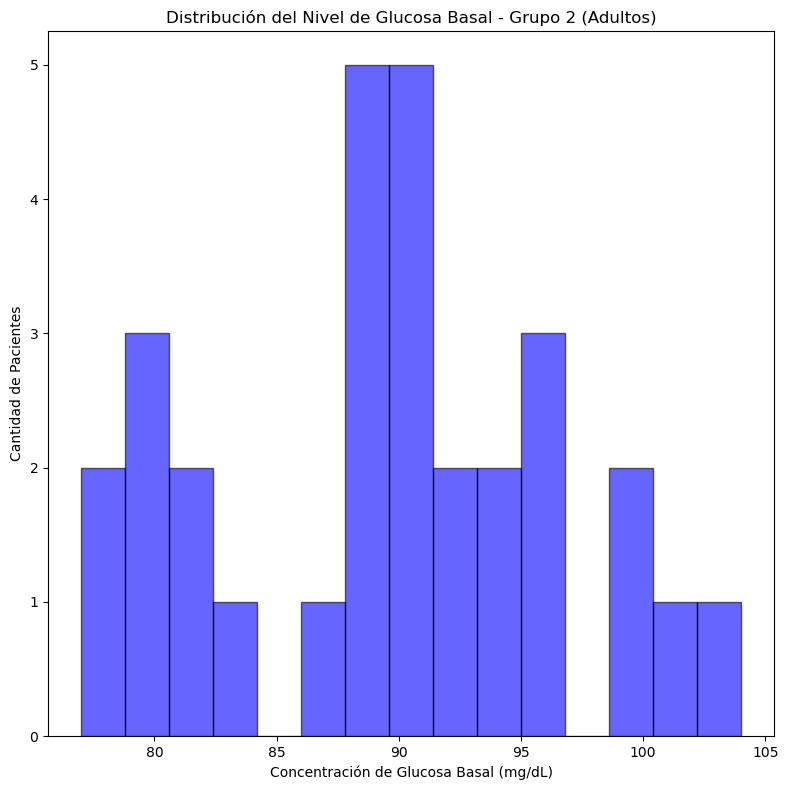

In [46]:
# Representación del histograma para el nivel basal en el Grupo 2
plt.figure(figsize=(8,8))
plt.hist(grupo2['Nivel glucosa basal'], bins=15, 
         color='blue', alpha=0.6, edgecolor='black')
plt.title('Distribución del Nivel de Glucosa Basal - Grupo 2 (Adultos)')
plt.xlabel('Concentración de Glucosa Basal (mg/dL)')
plt.ylabel('Cantidad de Pacientes')
plt.tight_layout() 
plt.show()


In [47]:
# Cálculo del coeficiente de asimetría para el Grupo 2
skew_basal = round(grupo2['Nivel glucosa basal'].skew(), 2)
skew_60min = round(grupo2['Nivel glucosa 60 min'].skew(), 2)

print(f'El coeficiente de asimetría para el nivel de glucosa basal en el Grupo 2 (Adultos) es {skew_basal}.')
if skew_basal < 0:
    print('La distribución presenta una asimetría negativa (sesgo a la izquierda).')
elif skew_basal > 0:
    print('La distribución presenta una asimetría positiva (sesgo a la derecha).')
else:
    print('La distribución es aproximadamente simétrica.')


El coeficiente de asimetría para el nivel de glucosa basal en el Grupo 2 (Adultos) es -0.01.
La distribución presenta una asimetría negativa (sesgo a la izquierda).


In [48]:
# Determinar el coeficiente de curtosis para el nivel basal en el Grupo 2
kurtosis_basal = round(grupo2['Nivel glucosa basal'].kurtosis(), 2)

print(f'El coeficiente de curtosis del nivel de glucosa basal en el Grupo 2 (Adultos) es {kurtosis_basal}.')
if kurtosis_basal < 0:
    print('La distribución es platicúrtica, es decir, menos concentrada que una distribución normal.')
elif kurtosis_basal > 0:
    print('La distribución es leptocúrtica, indicando una mayor concentración que una distribución normal.')
else:
    print('La distribución tiene una curtosis que se asemeja a la de una distribución normal.')


El coeficiente de curtosis del nivel de glucosa basal en el Grupo 2 (Adultos) es -0.61.
La distribución es platicúrtica, es decir, menos concentrada que una distribución normal.


c) Indicar para cada una de las variables de estudio (nivel glucosa
basal y nivel glucosa pasados 60 min) y en el grupo de control 1 el
valor de los cuartiles y su significado y obtener el box- plot (
diagrama de cajas) correspondiente. Estudiar la presencia devalores
atípicos

In [49]:
# Cálculo de los cuartiles y la mediana para las variables del Grupo 1
q1_basal = grupo1['Nivel glucosa basal'].quantile(0.25)
median_basal = grupo1['Nivel glucosa basal'].quantile(0.50)
q3_basal = grupo1['Nivel glucosa basal'].quantile(0.75)

q1_60min = grupo1['Nivel glucosa 60 min'].quantile(0.25)
median_60min = grupo1['Nivel glucosa 60 min'].quantile(0.50)
q3_60min = grupo1['Nivel glucosa 60 min'].quantile(0.75)

print(f"Primer Cuartil (Q1) - Nivel Glucosa Basal: {q1_basal}")
print(f"Mediana - Nivel Glucosa Basal: {median_basal}")
print(f"Tercer Cuartil (Q3) - Nivel Glucosa Basal: {q3_basal}\n")

print(f"Primer Cuartil (Q1) - Nivel Glucosa 60 Min: {q1_60min}")
print(f"Mediana - Nivel Glucosa 60 Min: {median_60min}")
print(f"Tercer Cuartil (Q3) - Nivel Glucosa 60 Min: {q3_60min}")


Primer Cuartil (Q1) - Nivel Glucosa Basal: 78.5
Mediana - Nivel Glucosa Basal: 82.0
Tercer Cuartil (Q3) - Nivel Glucosa Basal: 90.5

Primer Cuartil (Q1) - Nivel Glucosa 60 Min: 146.5
Mediana - Nivel Glucosa 60 Min: 150.0
Tercer Cuartil (Q3) - Nivel Glucosa 60 Min: 154.5


Comparando ambas variables, el nivel de glucosa a los 60 minutos tiene una dispersión más baja que el nivel de glucosa basal, lo que sugiere que los valores son más consistentes a los 60 minutos. Aunque ambos conjuntos tienen medias distintas, los rangos intercuartílicos reflejan que los datos están razonablemente agrupados y permiten identificar valores extremos con claridad.

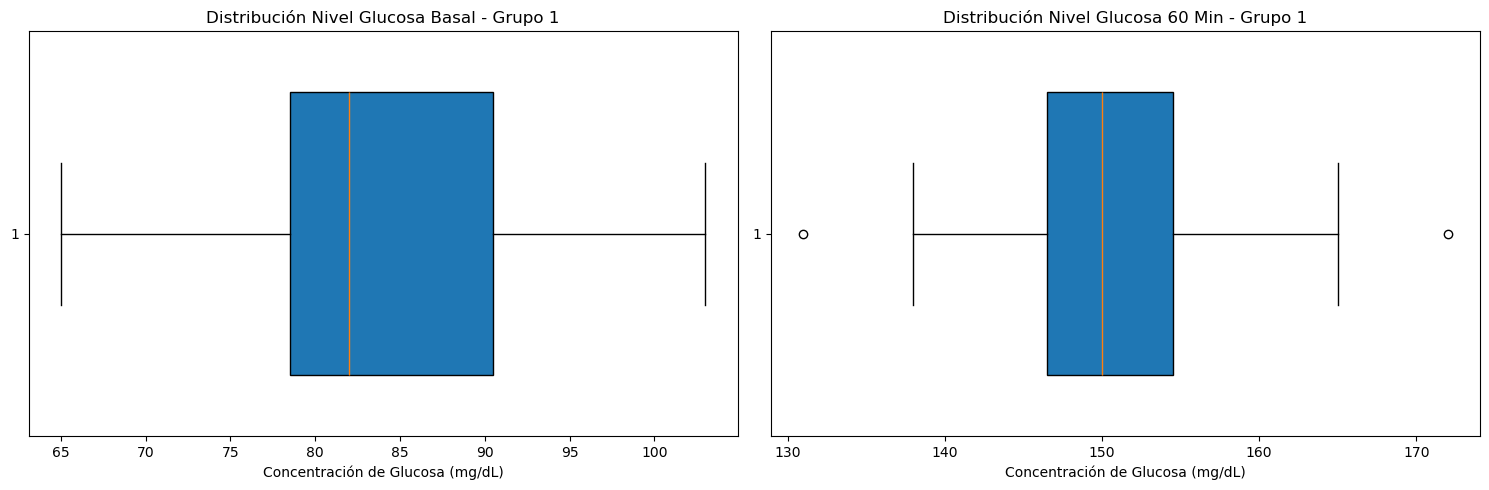

In [50]:
# Diagramas de cajas para los niveles de glucosa basal y a los 60 minutos en el Grupo 1
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].boxplot(grupo1['Nivel glucosa basal'], 
               vert=False, patch_artist=True, widths=0.7)
axs[0].set_title('Distribución Nivel Glucosa Basal - Grupo 1')
axs[0].set_xlabel('Concentración de Glucosa (mg/dL)')

axs[1].boxplot(grupo1['Nivel glucosa 60 min'], 
               vert=False, patch_artist=True, widths=0.7)
axs[1].set_title('Distribución Nivel Glucosa 60 Min - Grupo 1')
axs[1].set_xlabel('Concentración de Glucosa (mg/dL)')

plt.tight_layout()
plt.show()


In [51]:
def identificar_outliers(serie_datos):
    
    primer_cuartil = serie_datos.quantile(0.25)
    tercer_cuartil = serie_datos.quantile(0.75)
    rango_iqr = tercer_cuartil - primer_cuartil

    limite_inferior = primer_cuartil - 1.5 * rango_iqr
    limite_superior = tercer_cuartil + 1.5 * rango_iqr

    valores_atipicos = serie_datos[(serie_datos < limite_inferior) | 
                                   (serie_datos > limite_superior)]

    return valores_atipicos if not valores_atipicos.empty else None

outliers_basal = identificar_outliers(grupo1['Nivel glucosa basal'])
if outliers_basal is None:
    print("No se encontraron outliers en la distribución del Nivel Glucosa Basal.")
else:
    print('Valores atípicos detectados en el Nivel Glucosa Basal:')
    print(outliers_basal)


No se encontraron outliers en la distribución del Nivel Glucosa Basal.


In [52]:
# Identificar valores atípicos en el Nivel Glucosa a los 60 minutos
outliers_60min = identificar_outliers(grupo1['Nivel glucosa 60 min'])
if outliers_60min is None:
    print("No se encontraron valores atípicos en la distribución de Nivel Glucosa 60 Min.")
else:
    print('Valores atípicos detectados en el Nivel Glucosa 60 Min:')
    print(outliers_60min)


Valores atípicos detectados en el Nivel Glucosa 60 Min:
Grupo de control
1    172
1    131
Name: Nivel glucosa 60 min, dtype: int64


La distribución del Nivel de Glucosa Basal está concentrada en el rango esperado y es consistente para el grupo de control.

En cuanto al Nivel de Glucosa a los 60 Minutos, se identificaron dos valores atípicos: 172 (alto) y 131 (bajo). Esto sugiere que algunas mediciones fuera del rango normal probablemente reflejan una variación amplia en las respuestas de ciertos individuos a los 60 minutos. Estos valores atípicos pueden influir en las estadísticas descriptivas de esta variable y deben considerarse en el análisis general para no distorsionar las conclusiones sobre el comportamiento típico del grupo.

d) Estudiar la normalidad de los datos de cada uno de los grupos de
control estudiados para el nivel de glucosa pasados 60 minutos. 

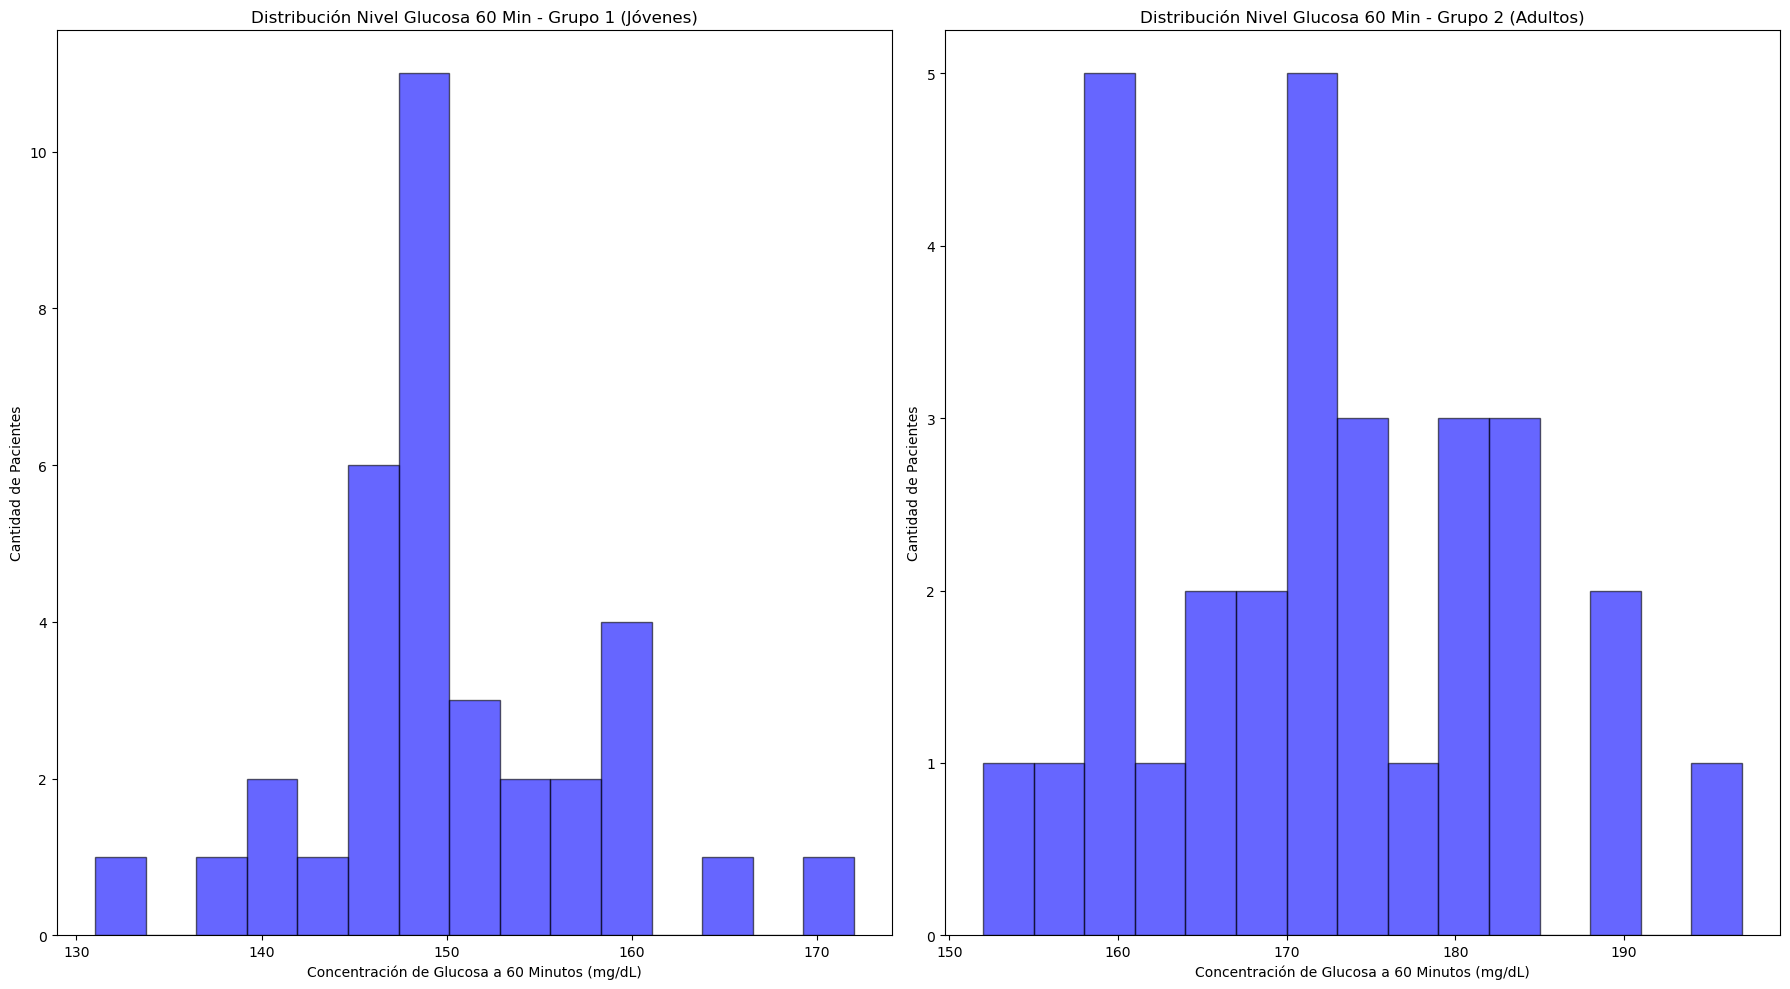

In [53]:
# Comparación de histogramas para el nivel de glucosa a los 60 minutos en ambos grupos
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

axs[0].hist(grupo1['Nivel glucosa 60 min'], bins=15, 
            color='blue', alpha=0.6, edgecolor='black')
axs[0].set_title('Distribución Nivel Glucosa 60 Min - Grupo 1 (Jóvenes)')
axs[0].set_xlabel('Concentración de Glucosa a 60 Minutos (mg/dL)')
axs[0].set_ylabel('Cantidad de Pacientes')

axs[1].hist(grupo2['Nivel glucosa 60 min'], bins=15, 
            color='blue', alpha=0.6, edgecolor='black')
axs[1].set_title('Distribución Nivel Glucosa 60 Min - Grupo 2 (Adultos)')
axs[1].set_xlabel('Concentración de Glucosa a 60 Minutos (mg/dL)')
axs[1].set_ylabel('Cantidad de Pacientes')

plt.tight_layout()
plt.show()


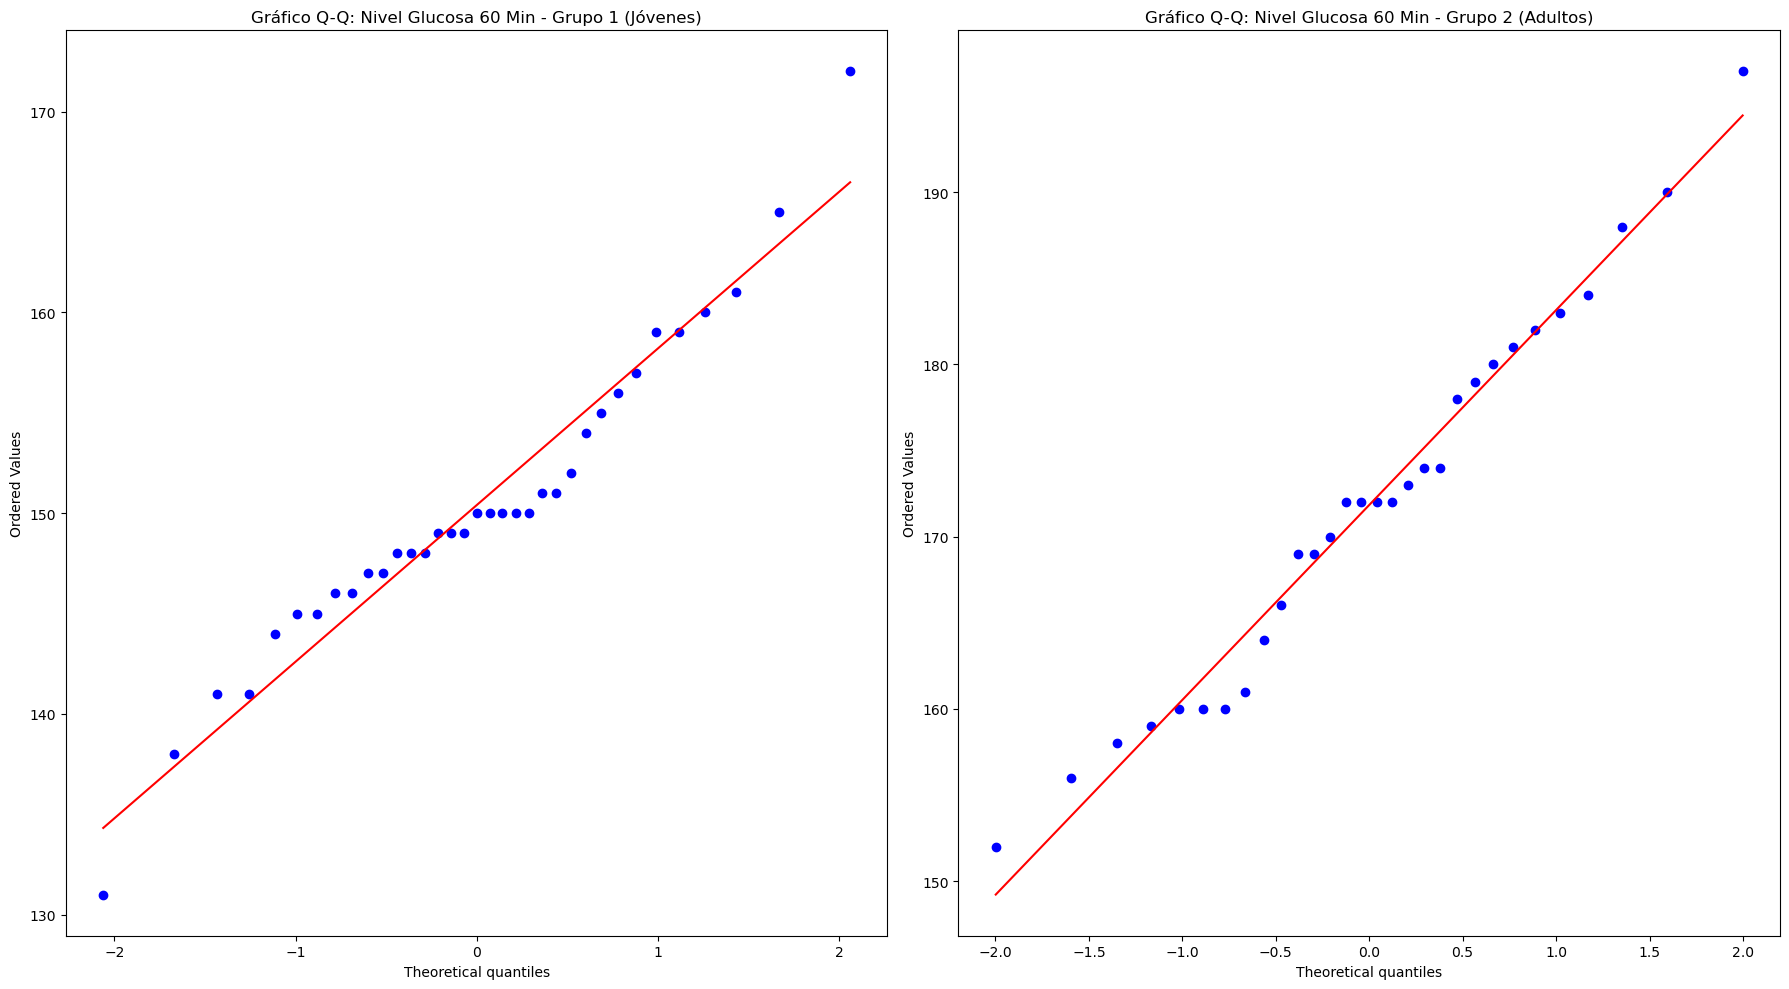

In [54]:
# Gráficos Q-Q para el nivel de glucosa a los 60 minutos en ambos grupos
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

probplot(grupo1['Nivel glucosa 60 min'], plot=axs[0])
axs[0].set_title('Gráfico Q-Q: Nivel Glucosa 60 Min - Grupo 1 (Jóvenes)')

probplot(grupo2['Nivel glucosa 60 min'], plot=axs[1])
axs[1].set_title('Gráfico Q-Q: Nivel Glucosa 60 Min - Grupo 2 (Adultos)')

plt.tight_layout()
plt.show()


In [55]:
# Prueba de Shapiro-Wilk para el Nivel de Glucosa a los 60 Minutos en el Grupo 1
shapiro_stat, shapiro_p = shapiro(grupo1['Nivel glucosa 60 min'])

print(f'Estadístico: {shapiro_stat:.4f}, p-valor: {shapiro_p:.4f}')
if shapiro_p > 0.05:
    print('Dado que el p-valor es mayor a 0.05, los datos del Nivel de Glucosa a 60 Minutos en el Grupo 1 parecen seguir una distribución normal.')
else:
    print('Dado que el p-valor es menor a 0.05, los datos del Nivel de Glucosa a 60 Minutos en el Grupo 1 no parecen seguir una distribución normal.')


Estadístico: 0.9626, p-valor: 0.2734
Dado que el p-valor es mayor a 0.05, los datos del Nivel de Glucosa a 60 Minutos en el Grupo 1 parecen seguir una distribución normal.


In [56]:
# Realizar la prueba de Shapiro-Wilk para el Nivel de Glucosa a 60 Minutos en el Grupo 2
shapiro_stat_2, shapiro_p_2 = shapiro(grupo2['Nivel glucosa 60 min'])

print(f'Estadístico de Shapiro-Wilk: {shapiro_stat_2:.4f}, p-valor: {shapiro_p_2:.4f}')
if shapiro_p_2 > 0.05:
    print('Dado que el p-valor es mayor a 0.05, los datos del Nivel de Glucosa a 60 Minutos en el Grupo 2 son consistentes con una distribución normal.')
else:
    print('Dado que el p-valor es menor a 0.05, los datos del Nivel de Glucosa a 60 Minutos en el Grupo 2 no son consistentes con una distribución normal.')


Estadístico de Shapiro-Wilk: 0.9776, p-valor: 0.7592
Dado que el p-valor es mayor a 0.05, los datos del Nivel de Glucosa a 60 Minutos en el Grupo 2 son consistentes con una distribución normal.


In [57]:
# Prueba de Kolmogorov-Smirnov para el Nivel de Glucosa a 60 Minutos en el Grupo 1
grupo1_estandarizado = stats.zscore(grupo1['Nivel glucosa 60 min'])
ks_stat, ks_p_val = kstest(grupo1_estandarizado, 'norm')

print(f'Estadístico KS para el Grupo 1: {ks_stat:.4f}, p-valor: {ks_p_val:.4f}')
if ks_p_val < 0.05:
    print("Con un nivel de significación del 5%, rechazamos la hipótesis nula. Esto indica que la muestra no sigue una distribución normal.")
else:
    print("Con un nivel de significación del 5%, no se puede rechazar la hipótesis nula. Esto sugiere que la muestra podría provenir de una distribución normal.")


Estadístico KS para el Grupo 1: 0.1544, p-valor: 0.3393
Con un nivel de significación del 5%, no se puede rechazar la hipótesis nula. Esto sugiere que la muestra podría provenir de una distribución normal.


In [58]:
# Prueba de Kolmogorov-Smirnov para el Nivel de Glucosa a 60 Minutos en el Grupo 2
grupo2_estandarizado = stats.zscore(grupo2['Nivel glucosa 60 min'])
ks_stat_2, ks_p_val_2 = kstest(grupo2_estandarizado, 'norm')

print(f'Estadístico KS para el Grupo 2: {ks_stat_2:.4f}, p-valor: {ks_p_val_2:.4f}')
if ks_p_val_2 < 0.05:
    print("Con un nivel de significación del 5%, se rechaza la hipótesis nula. Esto indica que la muestra no sigue una distribución normal.")
else:
    print("Con un nivel de significación del 5%, no se rechaza la hipótesis nula. Esto sugiere que la muestra podría ajustarse a una distribución normal.")


Estadístico KS para el Grupo 2: 0.1086, p-valor: 0.8340
Con un nivel de significación del 5%, no se rechaza la hipótesis nula. Esto sugiere que la muestra podría ajustarse a una distribución normal.


Para determinar si las muestras del Nivel de Glucosa a los 60 Minutos en los dos grupos de control tienen una distribución normal, comenzamos visualizando los datos mediante histogramas. En ambos casos, los histogramas mostraron distribuciones que parecían aproximadamente normales, aunque esta herramienta no es suficiente para confirmar la normalidad de forma concluyente.
Posteriormente, generamos Q-Q plots como otra forma de evaluar la normalidad. En estos gráficos, las distribuciones de los datos en ambos grupos se alinearon razonablemente bien con la línea de referencia, lo que sugiere una buena aproximación a una distribución normal.
Para confirmar esto, realizamos la prueba estadística de Shapiro-Wilk, que evalúa si una muestra proviene de una población distribuida normalmente. En esta prueba, la hipótesis nula asume normalidad, mientras que la hipótesis alternativa sugiere que los datos no siguen una distribución normal. Para el Grupo 1, obtuvimos un 𝑝 -valor
0.2734 p-valor=0.2734, y para el Grupo 2, un 𝑝 -valor
0.7592 p-valor=0.7592. Ambos valores son mayores que el nivel de significación de 0.05 0.05, lo que indica que no podemos rechazar la hipótesis nula. Por lo tanto, las muestras de ambos grupos parecen provenir de una distribución normal.
Adicionalmente, empleamos la prueba de Kolmogorov-Smirnov, que verifica si los datos de una muestra coinciden con una distribución conocida, en este caso, la normal. Para el Grupo 1, obtuvimos un 𝑝 -valor
0.3393 p-valor=0.3393, y para el Grupo 2, un 𝑝 -valor
0.8340 p-valor=0.8340. Estos resultados también están por encima del nivel de significación de 0.05 0.05, lo que respalda que las muestras son consistentes con una distribución normal.
Tanto los análisis visuales (histogramas y Q-Q plots) como las pruebas estadísticas de Shapiro-Wilk y Kolmogorov-Smirnov confirman que los datos del Nivel de Glucosa a los 60 Minutos en ambos grupos de control siguen una distribución normal.

Ejercicio 2

Con los datos del fichero anterior, se quiere estudiar la relación
existente entre el nivel basal y el nivel de glucosa que tienen los
pacientes sanos jóvenes( grupo 1) una hora después de tomar el
preparado de glucosa. Se pide:

a) Estudiar la relación lineal existente entre estas dos variables de
estudio gráficamente y mediante algún valor estadístico de forma
razonada.

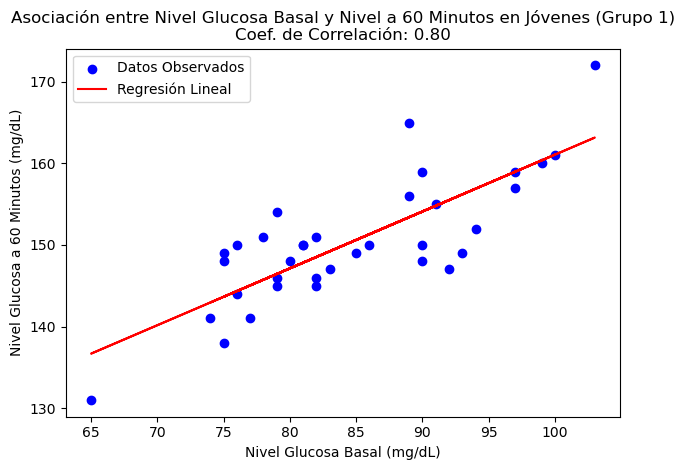

Valor del Coeficiente de Correlación: 0.796


In [59]:
# Análisis de la relación lineal entre el Nivel Basal y el Nivel de Glucosa a los 60 Minutos en el Grupo 1
coef_correlacion = grupo1['Nivel glucosa basal'].corr(grupo1['Nivel glucosa 60 min'])
pendiente, intercepto, coef_r, valor_p, error_std = linregress(grupo1['Nivel glucosa basal'], grupo1['Nivel glucosa 60 min'])

plt.scatter(grupo1['Nivel glucosa basal'], grupo1['Nivel glucosa 60 min'], 
            color='blue', label='Datos Observados')
plt.plot(grupo1['Nivel glucosa basal'], intercepto + pendiente * grupo1['Nivel glucosa basal'], 
         color='red', label='Regresión Lineal')
plt.xlabel('Nivel Glucosa Basal (mg/dL)')
plt.ylabel('Nivel Glucosa a 60 Minutos (mg/dL)')
plt.legend()
plt.title(f'Asociación entre Nivel Glucosa Basal y Nivel a 60 Minutos en Jóvenes (Grupo 1)\nCoef. de Correlación: {coef_correlacion:.2f}')
plt.tight_layout()
plt.show()
print(f"Valor del Coeficiente de Correlación: {round(coef_r, 3)}")

El gráfico evidencia una relación lineal entre el nivel de glucosa basal y el nivel de glucosa a los 60 minutos en los pacientes del Grupo 1. En general, al aumentar el nivel de glucosa basal, también se observa un incremento en el nivel de glucosa medido a los 60 minutos.

El coeficiente de correlación calculado es 0.796, lo que sugiere una conexión fuerte y positiva entre estas dos variables. Esto indica que el nivel de glucosa basal influye significativamente en el nivel de glucosa tras una hora, reforzando la relación entre estas mediciones en este grupo.

b) Obtener un modelo lineal que explica el nivel de glucosa en
sangre a los 60 minutos en función del nivel basal del paciente y
realizar la estimación para un paciente cuyo nivel basal es 83 mg/Dl

In [60]:
# Fórmula del modelo de regresión lineal
modelo_lineal = f'Y = {intercepto:.2f} + {pendiente:.2f} * Nivel Glucosa Basal'
print(modelo_lineal)
print("En esta ecuación, Y representa el Nivel de Glucosa a los 60 Minutos.")


Y = 91.38 + 0.70 * Nivel Glucosa Basal
En esta ecuación, Y representa el Nivel de Glucosa a los 60 Minutos.


In [61]:
# Definir una función para estimar el Nivel de Glucosa a 60 Minutos
def estimar_glucosa_60(x):
    return intercepto + pendiente * x

nivel_basal_dado = 83
prediccion_glucosa = estimar_glucosa_60(nivel_basal_dado).round(2)

print(f'Para un Nivel de Glucosa Basal de {nivel_basal_dado} mg/dL, \
la estimación del Nivel de Glucosa a los 60 Minutos es: {prediccion_glucosa} mg/dL')


Para un Nivel de Glucosa Basal de 83 mg/dL, la estimación del Nivel de Glucosa a los 60 Minutos es: 149.23 mg/dL


c) ¿Qué tanto por ciento del nivel de glucosa en sangre pasados 60
minutos queda no queda explicado por el anterior modelo?

In [62]:
# Determinar el porcentaje que el modelo no explica
coef_determinacion = coef_r**2
print(f'Coeficiente de Determinación (R²): {coef_determinacion:.4f}')
porcentaje_no_explicado = (1 - coef_determinacion) * 100
print(f'El {porcentaje_no_explicado:.2f}% del nivel de glucosa en sangre a los 60 minutos no es explicado por este modelo lineal.')


Coeficiente de Determinación (R²): 0.6343
El 36.57% del nivel de glucosa en sangre a los 60 minutos no es explicado por este modelo lineal.


d) Si aumentásemos el nivel basal de un paciente en 5 mg/Dl ¿Qué
variación experimentaría su nivel de glucosa al cabo de 60 minutos?

In [63]:
# Cambios en el nivel de glucosa debido a un incremento en el nivel basal de 5 mg/dL
aumento_basal = 5
cambio_glucosa = pendiente * aumento_basal
print(f'Si el nivel basal de un paciente aumenta en {aumento_basal} mg/dL, \
el nivel de glucosa a los 60 minutos se incrementa en aproximadamente {cambio_glucosa:.2f} mg/dL.')


Si el nivel basal de un paciente aumenta en 5 mg/dL, el nivel de glucosa a los 60 minutos se incrementa en aproximadamente 3.48 mg/dL.


Ejercicio 3

a) Se quiere estudiar si se puede admitir que el nivel medio de
glucosa en sangre en el momento de la ingestión en los jóvenes
es 88 mg/Dl. Obtener el intervalo de confianza al 95% y al 99%
para el nivel medio de glucosa en sangre de los jóvenes y
posteriormente contesta a la cuestión planteada con los
resultados obtenidos o con un contraste de hipótesis.

In [64]:
# Cálculo del Intervalo de Confianza al 95% para el Nivel Glucosa Basal en el Grupo 1
nivel_confianza = 0.95
nivel_significacion = 1 - nivel_confianza
promedio_muestra = grupo1['Nivel glucosa basal'].mean()
desviacion_estandar = grupo1['Nivel glucosa basal'].std(ddof=1)

t_critico = stats.t.ppf(1 - nivel_significacion / 2, 
                        df=len(grupo1['Nivel glucosa basal']) - 1)
error_margen = t_critico * (desviacion_estandar / 
                            np.sqrt(len(grupo1['Nivel glucosa basal'])))
confianza_intervalo = round(promedio_muestra - error_margen, 3), round(promedio_muestra + error_margen, 3)
print("Promedio de la Muestra:", promedio_muestra)
print("Margen de Error:", error_margen)
print("Intervalo de Confianza al 95%:", confianza_intervalo)


Promedio de la Muestra: 84.68571428571428
Margen de Error: 3.0381273526952426
Intervalo de Confianza al 95%: (81.648, 87.724)


In [65]:
# Cálculo del Intervalo de Confianza al 99% para el Nivel Glucosa Basal en el Grupo 1
nivel_confianza = 0.99
nivel_significacion = 1 - nivel_confianza
promedio_muestra = grupo1['Nivel glucosa basal'].mean()
desviacion_estandar = grupo1['Nivel glucosa basal'].std(ddof=1)

t_critico = stats.t.ppf(1 - nivel_significacion / 2, df=len(grupo1['Nivel glucosa basal']) - 1)
error_margen = t_critico * (desviacion_estandar / np.sqrt(len(grupo1['Nivel glucosa basal'])))
confianza_intervalo = round(promedio_muestra - error_margen, 3), round(promedio_muestra + error_margen, 3)

print("Promedio de la Muestra:", promedio_muestra)
print("Margen de Error:", error_margen)
print("Intervalo de Confianza al 99%:", confianza_intervalo)


Promedio de la Muestra: 84.68571428571428
Margen de Error: 4.078844606311631
Intervalo de Confianza al 99%: (80.607, 88.765)


Interpretación del intervalo de confianza al 95%

Para los jóvenes (Grupo 1), el intervalo de confianza al 95% para el nivel medio de glucosa basal se estima entre 81.648 y 87.724. Esto significa que, con un 95% de confianza, podemos afirmar que el verdadero promedio del nivel medio de glucosa basal en esta población se encuentra dentro de este rango. En términos técnicos, si tomáramos múltiples muestras aleatorias y calculáramos el intervalo de confianza al 95% para cada una, aproximadamente el 95% de estos intervalos incluirían el verdadero promedio poblacional. Este intervalo refleja la incertidumbre inherente al uso de datos muestrales para inferir parámetros poblacionales, considerando tanto el tamaño de la muestra como su variabilidad.

Interpretación del intervalo de confianza al 99%

Al aumentar el nivel de confianza al 99%, el intervalo se amplía a (80.607, 88.765). Este intervalo más amplio incluye un rango mayor de valores posibles para el promedio poblacional. Este aumento se debe a que, para alcanzar un mayor nivel de confianza, es necesario incluir una mayor proporción de valores posibles, lo que reduce la precisión. Sin embargo, asegura que en aproximadamente el 99% de las muestras aleatorias tomadas de esta población, el verdadero promedio estará contenido en este intervalo. En este caso, el valor hipotético de 88 mg/dL está dentro del intervalo al 99%, lo que sugiere que es plausible, aunque no está cerca del centro del rango.

Evaluación del valor hipotético y su relación con los intervalos

El valor hipotético de 88 mg/dL no se encuentra dentro del intervalo al 95%, lo que indica que, con este nivel de confianza, no es razonable asumir que el nivel medio de glucosa basal en los jóvenes sea 88 mg/dL. Esto implica que el valor probablemente está fuera del rango esperado para el promedio poblacional, basado en los datos observados. Sin embargo, al considerar el intervalo al 99%, el valor de 88 mg/dL apenas está incluido, lo que indica que podría ser plausible, aunque es probable que el promedio real sea menor.

Contraste de hipótesis

Dado que el valor hipotético no está contenido en el intervalo al 95%, se rechaza la hipótesis nula con este nivel de significación. Esto indica que los datos no son consistentes con la afirmación de que el promedio de glucosa basal es 88 mg/dL. Aunque el intervalo al 99% incluye este valor, el análisis refuerza que el promedio real es más probable que esté por debajo de 88 mg/dL.


b) Obtener los intervalos de confianza al 95% para la diferencia de
medias en el nivel basal de glucosa entre adultos yjovenes e
interpreta los resultados. ¿Se puede concluir que el nivel basal
de glucosa de los jóvenes y los adultos es el mismo con nivel de
significación del 5%? .Suponiendo que se cumplen las condiciones
iniciales teóricas para obtener los intervalos de confianza

In [66]:
# Intervalo de Confianza al 95% para la Diferencia de Medias
print("Hipótesis Nula: No hay diferencia en las medias entre los dos grupos.\n")
nivel_confianza = 0.95
nivel_significacion = 1 - nivel_confianza

grupo_adultos = grupo2['Nivel glucosa basal']
grupo_jovenes = grupo1['Nivel glucosa basal']

promedio_adultos = grupo_adultos.mean()
promedio_jovenes = grupo_jovenes.mean()
desviacion_adultos = grupo_adultos.std(ddof=1)
desviacion_jovenes = grupo_jovenes.std(ddof=1)

error_estandar = np.sqrt((desviacion_adultos**2 / len(grupo_adultos)) + (desviacion_jovenes**2 / len(grupo_jovenes)))

t_critico = stats.t.ppf(1 - nivel_significacion / 2, df=len(grupo_adultos) + len(grupo_jovenes) - 2)

margen_error = t_critico * error_estandar
intervalo_confianza = round(promedio_adultos - promedio_jovenes - margen_error, 3), round(promedio_adultos - promedio_jovenes + margen_error, 3)

print(f"Intervalo de Confianza al 95%: {intervalo_confianza}\n")

valor_nulo = 0
if intervalo_confianza[0] <= valor_nulo <= intervalo_confianza[1]:
    print("Dado que 0 está dentro del intervalo de confianza al 95%, \nno se puede rechazar la hipótesis nula. No hay evidencia de una diferencia significativa.")
else:
    print("Como 0 no está dentro del intervalo de confianza al 95%, \nse rechaza la hipótesis nula. Existe evidencia de una diferencia significativa.")


Hipótesis Nula: No hay diferencia en las medias entre los dos grupos.

Intervalo de Confianza al 95%: (0.701, 8.728)

Como 0 no está dentro del intervalo de confianza al 95%, 
se rechaza la hipótesis nula. Existe evidencia de una diferencia significativa.


El intervalo de confianza al 95% para la diferencia de medias es (0.701, 8.728). Esto indica que, con un nivel de confianza del 95%, podemos afirmar que la verdadera diferencia en el nivel basal de glucosa entre jóvenes y adultos está dentro de este rango.

Como el valor 0 no está incluido dentro del intervalo de confianza, se puede rechazar la hipótesis nula con un nivel de significación del 5%. Esto demuestra que existe una diferencia estadísticamente significativa entre los niveles basales de glucosa de jóvenes y adultos.

Con un nivel de significación del 5%, no se puede asumir que el nivel basal de glucosa de jóvenes y adultos sea igual. Los datos sugieren que los adultos tienen un nivel basal de glucosa significativamente mayor que los jóvenes, como lo demuestra el intervalo de confianza, que excluye el valor 0.

c) Se quiere estudiar la proporción de la población con un nivel
basal de glucosa superior a 95 mg/Dl (prediabetes). A partir de
la muestra del fichero (tomando todos los datos) obtener un
intervalo de confianza al 98% y contrastar la hipótesis que la
proporción de la población con glucosa superior a 95 mg/Dl es
0,15 con nivel de significación del 5%.


In [67]:
# Cálculo del Intervalo de Confianza al 98% para proporciones
umbral = 95
tamanio_muestra = df['Nivel glucosa basal'].count()
proporcion_muestral = (df['Nivel glucosa basal'] > umbral).mean()

nivel_significacion = 0.02

z_critico = norm.ppf(1 - nivel_significacion / 2)

error_estandar_prop = np.sqrt(proporcion_muestral * (1 - proporcion_muestral) / tamanio_muestra)

margen_error = z_critico * error_estandar_prop
intervalo_confianza = round(proporcion_muestral - margen_error, 3), round(proporcion_muestral + margen_error, 3)

print("Tamaño de la muestra:", tamanio_muestra)
print("Proporción Muestral:", proporcion_muestral)
print("Intervalo de Confianza al 98%:", intervalo_confianza)


Tamaño de la muestra: 65
Proporción Muestral: 0.16923076923076924
Intervalo de Confianza al 98%: (0.061, 0.277)


El intervalo de confianza al 98% para la proporción de la población con un nivel basal de glucosa superior a 95 mg/dL se calculó en el rango de (0.061, 0.277). Esto significa que, con un nivel de confianza del 98%, se puede afirmar que la verdadera proporción de la población con glucosa superior a 95 mg/dL se encuentra dentro de este intervalo. En términos generales, si se tomaran muchas muestras aleatorias y se calcularan intervalos de confianza al 98% para cada una, aproximadamente el 98% de ellos contendrían la verdadera proporción poblacional.

p=0.15 está contenido dentro del intervalo de confianza al 98% (0.061, 0.277). Esto significa que, con un nivel de significación del 2% (1−nivel de confianza), no se puede rechazar la hipótesis nula. Los datos respaldan la posibilidad de que la proporción real de la población con un nivel basal de glucosa superior a 95 mg/dL sea 0.15

Aunque no se puede afirmar que la proporción exacta sea 0.15, los datos observados, representados en el intervalo de confianza, indican que este valor es plausible. Por lo tanto, con un nivel de significación del 5%, no se rechaza la hipótesis nula, concluyendo que no hay evidencia suficiente para afirmar que la proporción real de la población con glucosa superior a 95 mg/dL sea diferente de 0.15.

In [68]:
h0 = 95  
muestra_n = df['Nivel glucosa basal'].count()  
muestra_proporcion = (df['Nivel glucosa basal'] > h0).mean() 

print("Hipótesis Nula (H0): La proporción es igual a 0.15")
print("Hipótesis Alternativa (H1): La proporción es distinta de 0.15")
nivel_significacion = 0.05
proporcion_esperada = 0.15

z_estadistico, p_valor = sm.stats.proportions_ztest(
    count=muestra_proporcion * muestra_n,
    nobs=muestra_n,
    value=proporcion_esperada
)


print(f'Estadístico Z: {z_estadistico:.4f}')
print(f'Valor P: {p_valor:.4f}')

if p_valor < nivel_significacion:
    print("Se rechaza la hipótesis nula con un nivel de significación del 5%. \nLos datos sugieren que la verdadera proporción difiere de 0.15.")
else:
    print("No se rechaza la hipótesis nula al nivel de significación del 5%. \nNo hay suficiente evidencia para concluir que la proporción sea diferente de 0.15.")


Hipótesis Nula (H0): La proporción es igual a 0.15
Hipótesis Alternativa (H1): La proporción es distinta de 0.15
Estadístico Z: 0.4135
Valor P: 0.6792
No se rechaza la hipótesis nula al nivel de significación del 5%. 
No hay suficiente evidencia para concluir que la proporción sea diferente de 0.15.


Se realizó un contraste de hipótesis para determinar si la proporción de la población con un nivel basal de glucosa superior a 95 mg/dL (prediabetes) es 0.15, utilizando un nivel de significación del 5%. La hipótesis nula  establece que la proporción verdadera es 0.15, mientras que la hipótesis alternativa plantea que la proporción no es igual a 0.15.

Dado que el p-valor es mayor que el nivel de significación (p>0.05), no se puede rechazar la hipótesis nula. Esto indica que los datos observados no proporcionan evidencia suficiente para concluir que la proporción real de la población con un nivel basal de glucosa superior a 95 mg/dL sea distinta de 0.15.

d) (VOLUNTARIO) ¿Se detecta una variación significativa del nivel
de glucosa en sangre en el grupo de los adultos después de la
toma ?

Nota: Se pretende comprobar si, como muestran los datos, los
niveles d de glucosa en sangre son distintos para los adultos en el
momento de la ingestión y a los 60 minutos, por ello para
contestar a la pregunta has de considerar las series de datos
obtenidas a partir de las diferencias entre el nivel basal y el nivel
de glucosa al cabode 60 minutos en el grupo de los adultos
(contraste de muestras emparejadas).

Plantea el correspondiente contraste de hipótesis considerando
un nivel de significación del 5%.

In [69]:
# Prueba de hipótesis para variación en niveles de glucosa en adultos
glucosa_antes = grupo2['Nivel glucosa basal']
glucosa_despues = grupo2['Nivel glucosa 60 min']

print("Hipótesis nula (H0): µ1 - µ2 = 0 (No hay diferencia en los niveles de glucosa)")
print("Hipótesis alternativa (H1): µ1 - µ2 ≠ 0 (Existe diferencia en los niveles de glucosa)")

estadistico_t, valor_p = stats.ttest_rel(glucosa_antes, glucosa_despues)

print(f'Estadístico T: {estadistico_t:.4f}')
print(f'P-valor: {valor_p:.6f}')


if valor_p < 0.05:
    print("Se rechaza la hipótesis nula con un nivel de significación del 5%. \nLos resultados indican que hay una variación significativa en los niveles de glucosa después de la toma en la población adulta.")
else:
    print("No se rechaza la hipótesis nula con un nivel de significación del 5%. \nNo se observa evidencia suficiente de una variación significativa en los niveles de glucosa después de la toma en la población adulta.")


Hipótesis nula (H0): µ1 - µ2 = 0 (No hay diferencia en los niveles de glucosa)
Hipótesis alternativa (H1): µ1 - µ2 ≠ 0 (Existe diferencia en los niveles de glucosa)
Estadístico T: -34.3741
P-valor: 0.000000
Se rechaza la hipótesis nula con un nivel de significación del 5%. 
Los resultados indican que hay una variación significativa en los niveles de glucosa después de la toma en la población adulta.


In [70]:
# Intervalo de Confianza para la Diferencia de Medias Emparejadas al 95%
print("Hipótesis nula (H0): µ1 - µ2 = 0 (No hay diferencia significativa en las medias)")
print("Hipótesis alternativa (H1): µ1 - µ2 ≠ 0 (Existe una diferencia significativa en las medias)")

grupo2 = df[df.index == 2].copy()

# Calcular la diferencia entre los niveles de glucosa basal y a los 60 minutos
grupo2['Diferencia'] = grupo2['Nivel glucosa 60 min'] - grupo2['Nivel glucosa basal']
diferencia = grupo2['Diferencia']


media_diferencia = diferencia.mean()
std_diferencia = diferencia.std(ddof=1)
error_estandar = std_diferencia / np.sqrt(len(diferencia))
nivel_confianza = 0.95
t_critico = stats.t.ppf((1 + nivel_confianza) / 2, df=len(diferencia) - 1)
margen_error = t_critico * error_estandar

intervalo_confianza = round(media_diferencia - margen_error, 4), round(media_diferencia + margen_error, 4)

print("Intervalo de Confianza al 95%:", intervalo_confianza)

valor_nulo = 0
if intervalo_confianza[0] <= valor_nulo <= intervalo_confianza[1]:
    print("Dado que 0 está dentro del intervalo de confianza al 95%, \nno se puede rechazar la hipótesis nula. Esto indica que no hay evidencia significativa de una diferencia.")
else:
    print("Dado que 0 no está dentro del intervalo de confianza al 95%, \nse rechaza la hipótesis nula. Esto sugiere que existe una diferencia significativa.")


Hipótesis nula (H0): µ1 - µ2 = 0 (No hay diferencia significativa en las medias)
Hipótesis alternativa (H1): µ1 - µ2 ≠ 0 (Existe una diferencia significativa en las medias)
Intervalo de Confianza al 95%: (77.5286, 87.338)
Dado que 0 no está dentro del intervalo de confianza al 95%, 
se rechaza la hipótesis nula. Esto sugiere que existe una diferencia significativa.


Se buscó determinar si los niveles de glucosa en sangre en adultos son significativamente diferentes antes y después de la ingestión de glucosa. Para ello, se planteó un contraste de hipótesis considerando las diferencias individuales en los niveles de glucosa en dos momentos específicos, utilizando un enfoque de datos emparejados. Este método es adecuado porque compara mediciones de la misma población en dos condiciones distintas: antes y 60 minutos después de la ingestión. El nivel de significación utilizado fue del 5%.

La hipótesis nula  establece que no hay diferencia en las medias de los niveles de glucosa antes y después de la ingestión . La hipótesis alternativa  plantea que existe una diferencia significativa entre estos niveles.
Para evaluar estas hipótesis, se calculó un intervalo de confianza al 95% para las diferencias en los niveles de glucosa, obteniéndose el rango (77.5286, 87.338).
Dado que el valor 0 no se encuentra dentro de este intervalo de confianza, se rechazó la hipótesis nula al nivel de significación del 5%. Esto implica que existe suficiente evidencia estadística para concluir que hay una diferencia significativa en los niveles de glucosa antes y después de la ingestión. Es decir, los datos indican que el proceso de ingestión provoca un cambio real en los niveles de glucosa.

El intervalo de confianza también proporciona información sobre la magnitud de esta diferencia. Con un 95% de confianza, se estima que el aumento promedio en los niveles de glucosa tras la ingestión está entre 77.5286 mg/dL y 87.338 mg/dL. Este resultado muestra un efecto consistente y relevante de la ingestión en los niveles de glucosa, siendo estadísticamente significativo y relevante en términos prácticos.

Estos resultados confirman que la ingestión de glucosa tiene un impacto significativo en los niveles de glucosa en sangre en adultos. La metodología utilizada, basada en el contraste de datos emparejados y el intervalo de confianza, permite concluir con un alto grado de certeza que los niveles de glucosa en sangre no son iguales antes y después de la ingestión. Esto valida que la intervención tiene un efecto medible y relevante en esta población específica.